<a href="https://colab.research.google.com/github/MrData-Science/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

El clustering en el aprendizaje automático es una técnica utilizada para agrupar un conjunto de datos en subconjuntos, o "clusters", donde los elementos dentro de cada cluster son similares entre sí en algún sentido, mientras que son diferentes de los elementos en otros clusters.

## Carga de datos y descripcion del dataset

Data Description

+ Apps Number of applications received
+ Accept Number of applications accepted
+ Enroll Number of new students enrolled
+ Top10perc Pct. new students from top 10% of H.S. class
+ Top25perc Pct. new students from top 25% of H.S. class
+ F.Undergrad Number of fulltime undergraduates
+ P.Undergrad Number of parttime undergraduates
+ Outstate Out-of-state tuition
+ Room.Board Room and board costs
+ Books Estimated book costs
+ Personal Estimated personal spending
+ PhD Pct. of faculty with Ph.D.’s
+ Terminal Pct. of faculty with terminal degree
+ S.F.Ratio Student/faculty ratio
+ perc.alumni Pct. alumni who donate
+ Expend Instructional expenditure per student
+ Grad.Rate Graduation rate

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/UniversityStudentsData.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df.drop('Private',axis=1,inplace= True)
df.rename(columns= {'Unnamed: 0': 'University'},inplace=True)
df

,University,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## Analisis exploratorio

In [4]:
df.shape

(777, 18)

In [5]:
df.describe().columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

### Definicion de variables

In [7]:
categorical_data= ['University']
numerical_data = [x for x in df.columns if x not in categorical_data]

### Correlacion de los datos

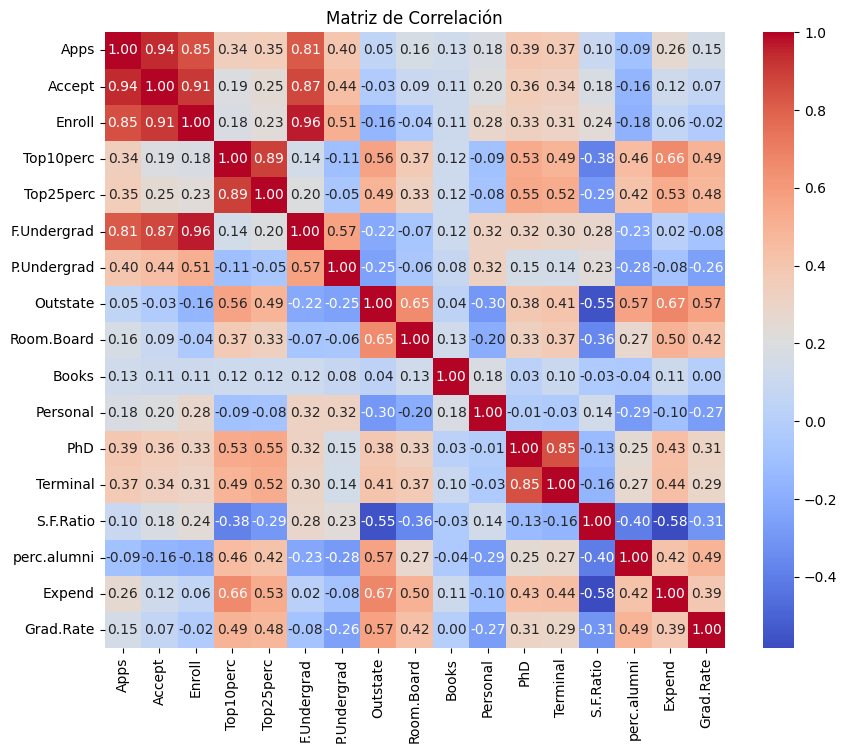

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[numerical_data].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Completitud de los datos

In [9]:
df.isnull().sum()

University     0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### Visualizacion de los datos

array([[<Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>,
        <Axes: title={'center': 'Top10perc'}>],
       [<Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>,
        <Axes: title={'center': 'Outstate'}>],
       [<Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>,
        <Axes: title={'center': 'PhD'}>],
       [<Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>,
        <Axes: title={'center': 'Expend'}>],
       [<Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

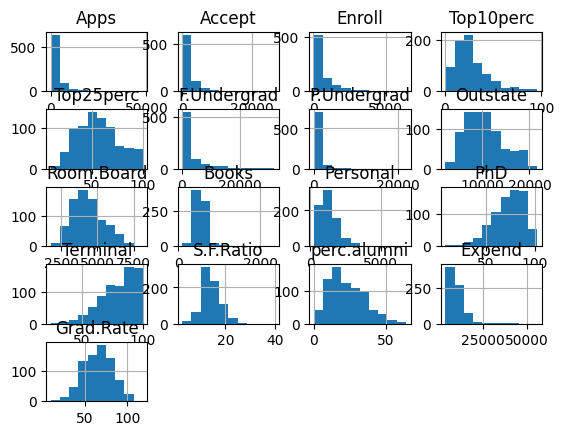

In [10]:
df.hist()

### Eliminacion de valores extremos

In [11]:
numerical_df = df[numerical_data].copy()

In [12]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)

In [13]:
IQR = Q3-Q1

In [14]:
analysis = -(((numerical_df < (Q1 - 5 * IQR)) | (numerical_df > (Q3 + 5 * IQR)))).any(axis = 1)

In [15]:
analysis

0       True
1       True
2       True
3       True
4       True
       ...  
772     True
773     True
774     True
775    False
776     True
Length: 777, dtype: bool

In [16]:
len(numerical_df)-len(numerical_df[analysis])

48

In [17]:
numerical_df = numerical_df[analysis]
numerical_df.shape

(729, 17)

array([[<Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>,
        <Axes: title={'center': 'Top10perc'}>],
       [<Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>,
        <Axes: title={'center': 'Outstate'}>],
       [<Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>,
        <Axes: title={'center': 'PhD'}>],
       [<Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>,
        <Axes: title={'center': 'Expend'}>],
       [<Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

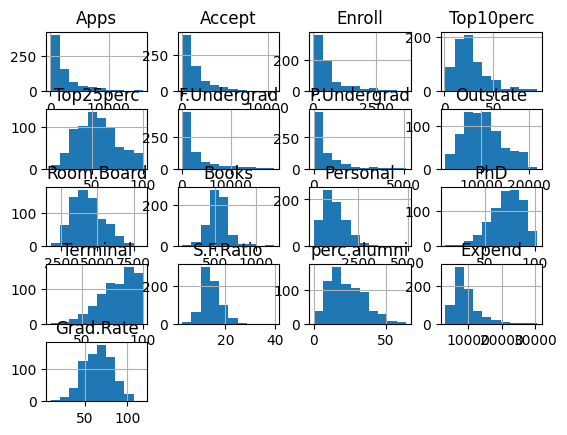

In [18]:
numerical_df.hist()

## Preprocesamiento de datos

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
X = numerical_df.reset_index(drop=True).copy()
X_perfil = X

In [21]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [22]:
Xs = pd.DataFrame(scaler.transform(X), columns=X.columns)
pca = PCA(n_components=3)
pca.fit(Xs)

PCA(n_components=3)

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.32556017, 0.5929107 , 0.66067406])

In [24]:
Xf = pd.DataFrame(pca.transform(Xs), columns=['p1','p2','p3'])

## Modelado

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### Encontrar el numero optimo de clusters (Metodo del codo)

In [26]:
lst_in = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

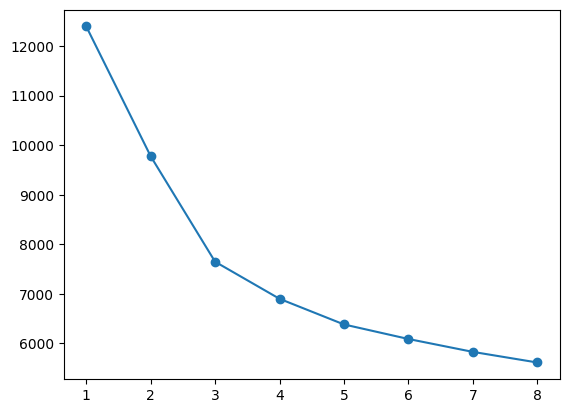

In [27]:
plt.plot(range(1,9),lst_in,marker='o')

### K-Means

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xf)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Xf['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


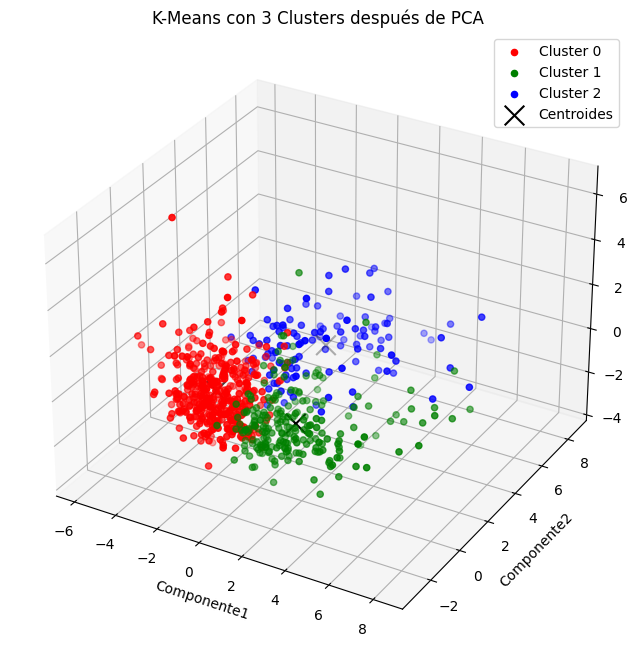

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(3):
    cluster_data = Xf[Xf['Cluster'] == i]
    ax.scatter(cluster_data['p1'], cluster_data['p2'], cluster_data['p3'], c=colors[i], label=f'Cluster {i}')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, c='k', label='Centroides')
ax.set_xlabel('Componente1')
ax.set_ylabel('Componente2')
ax.set_zlabel('Componente3')
ax.set_title('K-Means con 3 Clusters después de PCA')
ax.legend()
plt.grid(True)
plt.show()